In [ ]:
from synthetic_simulations import run_simulation
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
METHODS=['er_deterministic', 'raw_deterministic', 'merit', 'swiss']
STATS = ['prec', 'prec_quality']
NAMES = {
    'er_deterministic': 'Deterministic (Adjusted Scores)',
    'raw_deterministic': 'Deterministic (Raw Scores)',
    'merit': 'MERIT',
    'swiss': 'SWISS'
}

In [3]:
df = pd.read_csv('res/simulation_results/linear_miscalibration_results_swissnsfparams.csv')

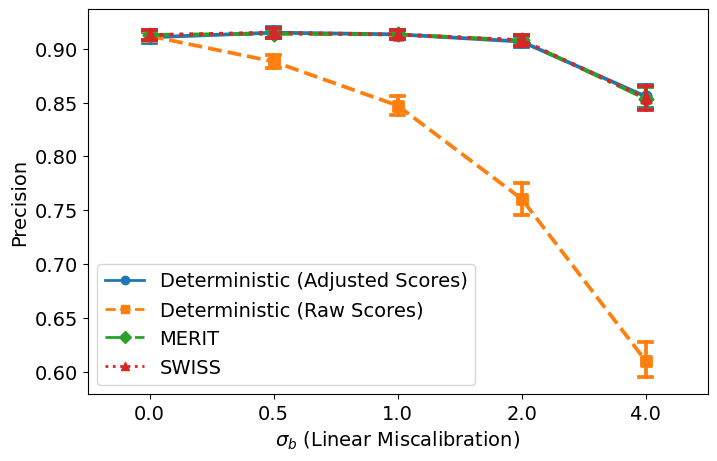

In [6]:
from matplotlib.lines import Line2D

df_plot = df[df.k == df.n_items // 3]

# Melt the DataFrame for seaborn
df_melt = df_plot.melt(
    id_vars=['sigma_b'],
    value_vars=[f'prec_{m}' for m in METHODS],
    var_name='Method',
    value_name='Precision'
)
df_melt['Method'] = df_melt['Method'].map(lambda x: NAMES[x.replace('prec_', '')])

plt.figure(figsize=(8, 5))
ax = sns.pointplot(
    data=df_melt,
    x='sigma_b',
    y='Precision',
    hue='Method',
    errorbar=('ci', 95),
    n_boot=1000,
    capsize=0.1,
    markers=['o', 's', 'D', '^'],
    linestyles=['-', '--', '-.', ':'],
    join=True
)
ax.set_ylabel('Precision', fontsize=14)
ax.set_xlabel('$\sigma_b$ (Linear Miscalibration)', fontsize=14)

# Custom legend with both line and marker
unique_methods = df_melt['Method'].unique()
colors = sns.color_palette(n_colors=len(unique_methods))
markers = ['o', 's', 'D', '^']
linestyles = ['-', '--', '-.', ':']

legend_elements = [
    Line2D(
        [0], [0],
        marker=markers[i],
        linestyle=linestyles[i],
        color=colors[i],
        label=method,
        markersize=6,
        linewidth=2
    )
    for i, method in enumerate(unique_methods)
]

ax.legend(handles=legend_elements, loc='best', frameon=True, fontsize=14)
ax.tick_params(axis='both', labelsize=14)

plt.show()

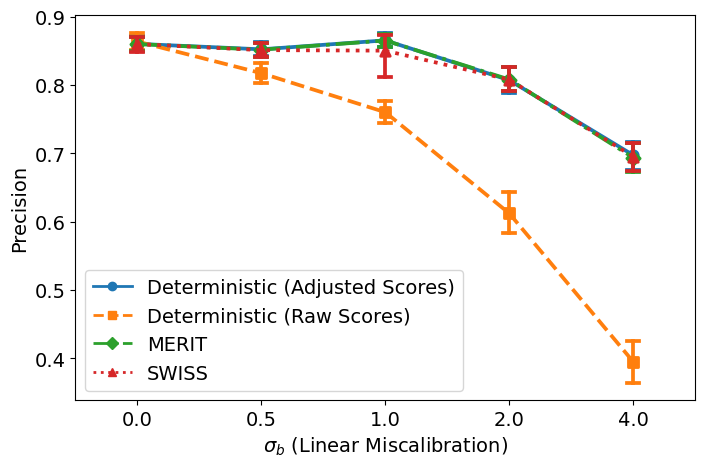

In [9]:
from matplotlib.lines import Line2D

df_plot = df[df.k == df.n_items // 10]

# Melt the DataFrame for seaborn
df_melt = df_plot.melt(
    id_vars=['sigma_b'],
    value_vars=[f'prec_{m}' for m in METHODS],
    var_name='Method',
    value_name='Precision'
)
df_melt['Method'] = df_melt['Method'].map(lambda x: NAMES[x.replace('prec_', '')])

plt.figure(figsize=(8, 5))
ax = sns.pointplot(
    data=df_melt,
    x='sigma_b',
    y='Precision',
    hue='Method',
    errorbar=('ci', 95),
    n_boot=1000,
    capsize=0.1,
    markers=['o', 's', 'D', '^'],
    linestyles=['-', '--', '-.', ':'],
    join=True
)
ax.set_ylabel('Precision', fontsize=14)
ax.set_xlabel('$\sigma_b$ (Linear Miscalibration)', fontsize=14)

# Custom legend with both line and marker
unique_methods = df_melt['Method'].unique()
colors = sns.color_palette(n_colors=len(unique_methods))
markers = ['o', 's', 'D', '^']
linestyles = ['-', '--', '-.', ':']

legend_elements = [
    Line2D(
        [0], [0],
        marker=markers[i],
        linestyle=linestyles[i],
        color=colors[i],
        label=method,
        markersize=6,
        linewidth=2
    )
    for i, method in enumerate(unique_methods)
]

ax.legend(handles=legend_elements, loc='best', frameon=True, fontsize=14)
ax.tick_params(axis='both', labelsize=14)

plt.show()

In [24]:
import os

data_dir = 'res/simulation_results/interesting_cases'
data_files = [f for f in os.listdir(data_dir) if f.endswith('.npz')]

loaded_data = []
for file in data_files:
    data = np.load(os.path.join(data_dir, file))
    loaded_data.append({
        'filename': file,
        'intervals50': data['intervals50'],
        'p_merit': data['p_merit'],
        'p_swiss': data['p_swiss'],
        'er': data['er'],
        'theta': data['theta'],
        'y': data['y'],
        'A': data['A']
    })

## Model Mismatch Simulations

In [6]:
arbitrary_results = []

for pct_arbitrary in [0, 0.25, 0.5, 0.75, 1.0]:
    print(f"Running simulation with proportion non-linear = {pct_arbitrary}...")

    arbitrary_miscalibration_params['pct_arbitrary'] = pct_arbitrary
    
    res = run_simulation(
        n_items, n_reviewers, items_per_rev, arbitrary_miscalibration_params, 'arbitrary', ks, n_trials=n_trials
    )

    arbitrary_results.append(res)
# Concatenate all results into a single DataFrame
arbitrary_results_df = pd.concat(arbitrary_results, ignore_index=True)

Running simulation with proportion non-linear = 0...
Running iteration 1/10...
Running iteration 2/10...
Running iteration 3/10...
Running iteration 4/10...
Running iteration 5/10...
Running iteration 6/10...
Running iteration 7/10...
Running iteration 8/10...
Running iteration 9/10...
Running iteration 10/10...
Running simulation with proportion non-linear = 0.25...
Running iteration 1/10...
Running iteration 2/10...
Running iteration 3/10...
Running iteration 4/10...
Running iteration 5/10...
Running iteration 6/10...
Running iteration 7/10...
Running iteration 8/10...
Running iteration 9/10...
Running iteration 10/10...
Running simulation with proportion non-linear = 0.5...
Running iteration 1/10...
Running iteration 2/10...
Running iteration 3/10...
Running iteration 4/10...
Running iteration 5/10...
Running iteration 6/10...
Running iteration 7/10...
Running iteration 8/10...
Running iteration 9/10...
Running iteration 10/10...
Running simulation with proportion non-linear = 0.75.

In [17]:
risky_bias_params = {
    'sigma_theta': sigma_theta,
    'sigma_b': None,
    'sigma_err': sigma_err,
    'prob_biased': None,
    'risky_threshold': 7.5,
    'risky_bias': 5
}

In [18]:
for prob_biased in [0, 0.25, 0.5, 0.75, 1.0]:
    print(f"Running simulation with probability of bias = {prob_biased}...")

    risky_bias_params['prob_biased'] = prob_biased
    
    res = run_simulation(
        n_items, n_reviewers, items_per_rev, risky_bias_params, 'riskybias', ks, n_trials=n_trials
    )

    if 'risky_results' not in locals():
        risky_results = res
    else:
        risky_results = pd.concat([risky_results, res], ignore_index=True)
# Concatenate all results into a single DataFrame
risky_results_df = risky_results

Running simulation with probability of bias = 0...
Running iteration 1/10...
Running iteration 2/10...
Running iteration 3/10...
Running iteration 4/10...
Running iteration 5/10...
Running iteration 6/10...
Running iteration 7/10...
Running iteration 8/10...
Running iteration 9/10...
Running iteration 10/10...
Running simulation with probability of bias = 0.25...
Running iteration 1/10...
Running iteration 2/10...
Running iteration 3/10...
Running iteration 4/10...
Running iteration 5/10...
Running iteration 6/10...
Running iteration 7/10...
Running iteration 8/10...
Running iteration 9/10...
Running iteration 10/10...
Running simulation with probability of bias = 0.5...
Running iteration 1/10...
Running iteration 2/10...
Running iteration 3/10...
Running iteration 4/10...
Running iteration 5/10...
Running iteration 6/10...
Running iteration 7/10...
Running iteration 8/10...
Running iteration 9/10...
Running iteration 10/10...
Running simulation with probability of bias = 0.75...
Runni

In [26]:
linear_results_df['sigma_a'] = linear_results_df['sigma_a'].fillna(0)

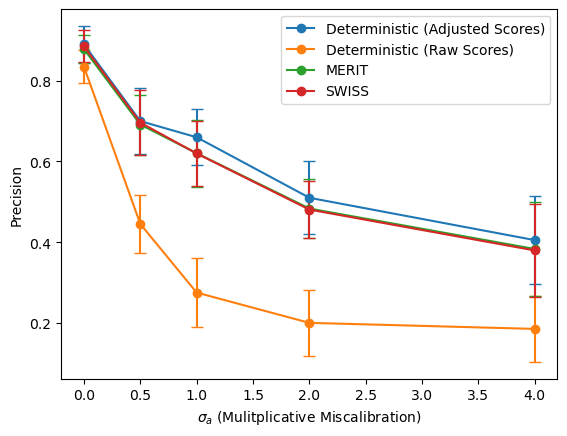

In [31]:
df_plot = linear_results_df[linear_results_df.k == n_items // 10]
grouped = df_plot.groupby('sigma_a')[[f'prec_{m}' for m in METHODS]]
means = grouped.mean()
stds = grouped.std()

means.columns = [NAMES[m] for m in METHODS]
stds.columns = [NAMES[m] for m in METHODS]

ax = means.plot(yerr=stds, marker='o', capsize=4)
ax.set_ylabel('Precision')
ax.set_xlabel('$\sigma_a$ (Mulitplicative Miscalibration)')
plt.show()

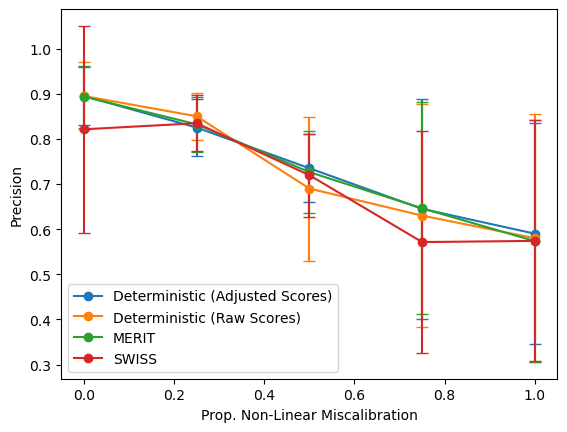

In [33]:
df_plot = arbitrary_results_df[arbitrary_results_df.k == n_items // 10]
grouped = df_plot.groupby('pct_arbitrary')[[f'prec_{m}' for m in METHODS]]
means = grouped.mean()
stds = grouped.std()

means.columns = [NAMES[m] for m in METHODS]
stds.columns = [NAMES[m] for m in METHODS]


ax = means.plot(yerr=stds, marker='o', capsize=4)
ax.set_ylabel('Precision')
ax.set_xlabel('Prop. Non-Linear Miscalibration')
plt.show()

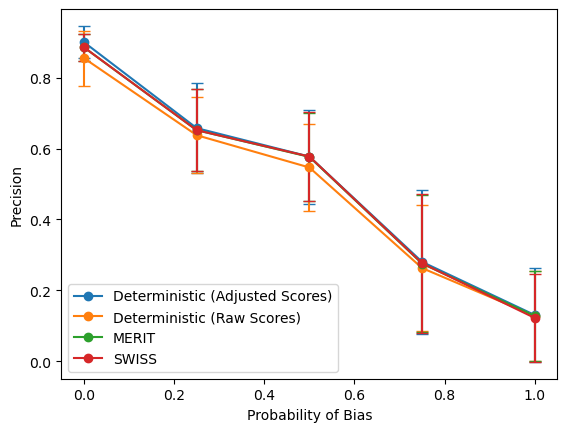

In [19]:
df_plot = risky_results_df[risky_results_df.k == n_items // 10]
grouped = df_plot.groupby('prob_biased')[[f'prec_{m}' for m in METHODS]]
means = grouped.mean()
stds = grouped.std()

means.columns = [NAMES[m] for m in METHODS]
stds.columns = [NAMES[m] for m in METHODS]

ax = means.plot(yerr=stds, marker='o', capsize=4)
ax.set_ylabel('Precision')
ax.set_xlabel('Probability of Bias')
plt.show()

In [5]:
pareto_miscalibration_params = {
    'pareto_shape': 1.2,
    'sigma_err': 0.0,
    'miscal_range': None
}

In [7]:
for miscal_range in [0., 0.2, 0.4, 0.6, 0.8]:
    print(f"Running simulation with pareto miscalibration range = {miscal_range}...")

    pareto_miscalibration_params['miscal_range'] = miscal_range
    
    res = run_simulation(
        n_items, n_reviewers, items_per_rev, pareto_miscalibration_params, 'pareto', ks, n_trials=n_trials
    )

    if 'pareto_results_df' not in locals():
        pareto_results_df = res
    else:
        pareto_results_df = pd.concat([pareto_results_df, res], ignore_index=True)

Running simulation with pareto miscalibration range = 0.0...
Running iteration 1/10...


 /Users/akgoldbe/Library/CloudStorage/Dropbox/My Mac (MacBook-Air)/Documents/CMU/research/lottery/simulations.py:264: RuntimeWarning:covariance is not symmetric positive-semidefinite.


Running iteration 2/10...
Running iteration 3/10...
Running iteration 4/10...


 /Users/akgoldbe/Library/CloudStorage/Dropbox/My Mac (MacBook-Air)/Documents/CMU/research/lottery/simulations.py:264: RuntimeWarning:covariance is not symmetric positive-semidefinite.


Running iteration 5/10...


 /Users/akgoldbe/Library/CloudStorage/Dropbox/My Mac (MacBook-Air)/Documents/CMU/research/lottery/simulations.py:264: RuntimeWarning:covariance is not symmetric positive-semidefinite.


Running iteration 6/10...
Running iteration 7/10...
Running iteration 8/10...
Running iteration 9/10...
Running iteration 10/10...
Running simulation with pareto miscalibration range = 0.2...
Running iteration 1/10...
Running iteration 2/10...
Running iteration 3/10...
Running iteration 4/10...
Running iteration 5/10...
Running iteration 6/10...
Running iteration 7/10...
Running iteration 8/10...
Running iteration 9/10...
Running iteration 10/10...
Running simulation with pareto miscalibration range = 0.4...
Running iteration 1/10...
Running iteration 2/10...
Running iteration 3/10...
Running iteration 4/10...
Running iteration 5/10...
Running iteration 6/10...
Running iteration 7/10...
Running iteration 8/10...
Running iteration 9/10...
Running iteration 10/10...
Running simulation with pareto miscalibration range = 0.6...
Running iteration 1/10...
Running iteration 2/10...
Running iteration 3/10...
Running iteration 4/10...
Running iteration 5/10...
Running iteration 6/10...
Running 

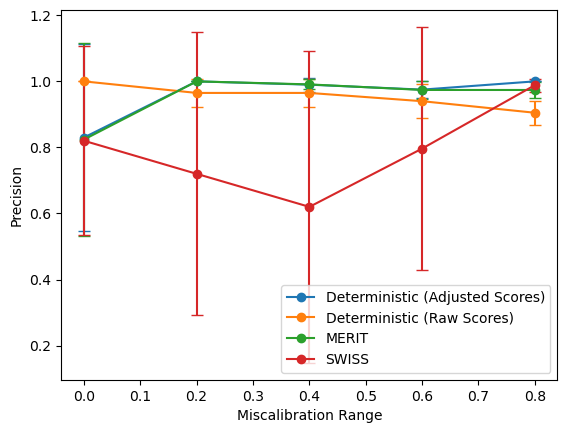

In [9]:
df_plot = pareto_results_df[pareto_results_df.k == n_items // 10]
grouped = df_plot.groupby('miscal_range')[[f'prec_{m}' for m in METHODS]]
means = grouped.mean()
stds = grouped.std()

means.columns = [NAMES[m] for m in METHODS]
stds.columns = [NAMES[m] for m in METHODS]

ax = means.plot(yerr=stds, marker='o', capsize=4)
ax.set_ylabel('Precision')
ax.set_xlabel('Miscalibration Range')
plt.show()